This is the classic _Gambler's Ruin_ problem, phrased in terms of an MRP, which I'll try using Gradient MC to learn. The advantage of this problem is that the value function has a closed-form solution, so it's easy to check whether the algorithm learns the correct values.


Parameters:

- N: number of states
- p: probability of moving right by 1 unit


In [40]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [111]:
class GamblersEnv(gym.Env):
    def __init__(self, N: int, p: float):
        self.N = N
        self.p = p

        self.observation_space = spaces.Discrete(N, start=0)
        self.action_space = None

        self._start = int(np.ceil(N / 2))

    def reset(self):
        self._state = self._start
        return self._state, {}

    def step(self):
        s = self._state
        s += 1 if np.random.random() < self.p else -1
        terminated = True if s == 0 or s == self.N else False
        reward = 1 if s == self.N else False
        # reward = -1 if s == 0 else 1 if s == self.N else False
        self._state = s
        return s, reward, terminated, False, {}

In [182]:
N = 10
p = 0.6

w = np.zeros((3,))


def x(s):
    return np.array([1, s, s * s])


def v_hat(s):
    return x(s) @ w


num_episodes = int(1e4)
alpha = 1e-5

env = GamblersEnv(N, p)
for episode in range(num_episodes):
    s0, _ = env.reset()
    states = [s0]
    done = False
    while not done:
        s, r, terminated, _, _ = env.step()
        states.append(s)
        done = terminated
    target = r
    states.pop()
    for s in states:
        delta_w = alpha * (target - v_hat(s)) * x(s)
        # print(delta_w)
        w += delta_w

In [185]:
w

array([ 0.09266846,  0.24035225, -0.01492938])

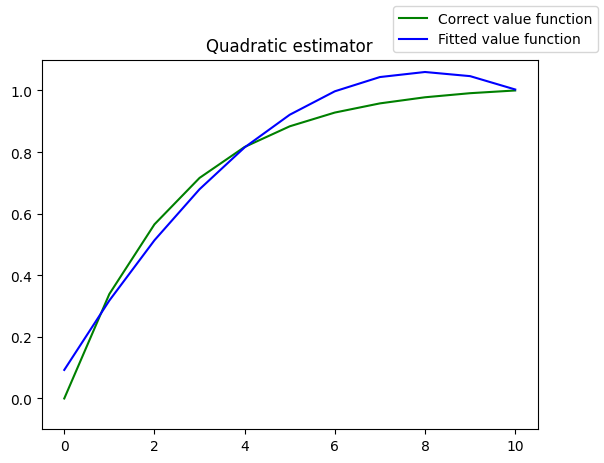

In [184]:
fig, ax = plt.subplots()


xs = np.arange(0, N + 1)
r = (1 - p) / p
y_correct = (1 - r**xs) / (1 - r**N)
y_fit = np.array([v_hat(x) for x in xs])

ax.plot(xs, y_correct, color="green", label="Correct value function")
ax.plot(xs, y_fit, color="blue", label="Fitted value function")

ax.set_ylim([-0.1, 1.1])

ax.set_title("Quadratic estimator")
# ax.set_title("Cubic estimator")
fig.legend()

plt.show()

In [47]:
np.array([1, 4, 9]) / np.array([1, 2, 3])

array([1., 2., 3.])

In [14]:
x(2)

array([1, 2, 4, 8])

In [19]:
w = np.array([4, 3, 2, 1])
x(2) @ w

np.int64(26)